<a href="https://colab.research.google.com/github/tangcc35/DATA1030-Project-Cangcheng/blob/master/Diversification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# set inputs
mu = .01  # e[ret] %
sigma = .09 # sdev %
num_assets = 3
num_months = 200

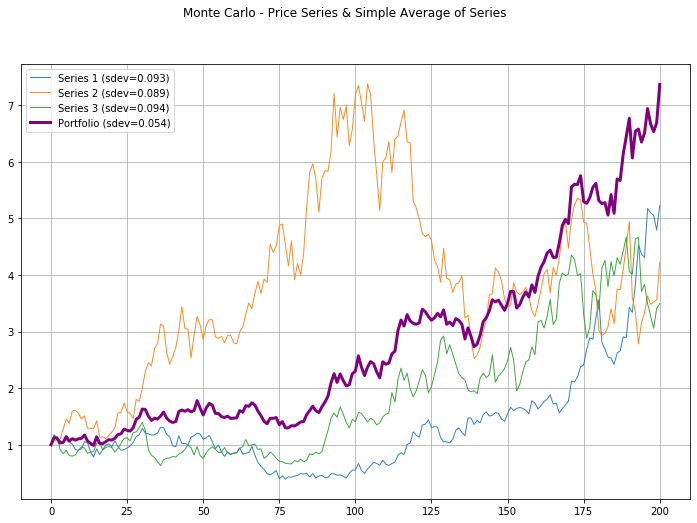

In [0]:
#@title
# mathematical
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt


# generate random returns from normal distribution
ret = np.random.normal(mu, sigma, [num_months, num_assets])

# set portfolio returns to be equal-weighted average of individual returns
pret = ret.mean(axis=1, keepdims=True)

# calculate value index for items
val_ones = np.ones([1,num_assets])
val = (1+ret).cumprod(axis=0)
val = np.concatenate([val_ones, val])

# calculate value index for "portfolio"
val_ones = np.ones([1,1])
pval = (1+pret).cumprod(axis=0)
pval = np.concatenate([val_ones, pval])

# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
fig.suptitle('Monte Carlo - Price Series & Simple Average of Series')

for idx in range(0, num_assets):
  data = val[:,idx]
  sdev = np.std(ret[:,idx],ddof=1)
  label = 'Series {} (sdev={:0.3f})'.format(idx+1, sdev)
  ax.plot(data,linewidth=1, alpha=0.9, label=label)

sdev = np.std(pret,ddof=1)
label = 'Portfolio (sdev={:0.3f})'.format(sdev)
ax.plot(pval, linewidth=3, color='purple', label=label)

ax.grid('both')
ax.legend()

out=None # here so no default output printed other than plot
